<a href="https://colab.research.google.com/github/nbchen176-dev/employee_satisfaction_baxa_tech_night_project/blob/main/employee_satisfaction_tech_night_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
employee_df = pd.read_csv("Employee Attrition.csv")
employee_df = employee_df.drop(columns='dept')
employee_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,low


<Axes: title={'center': 'Satisfaction vs Hours Worked'}, xlabel='average_montly_hours', ylabel='satisfaction_level'>

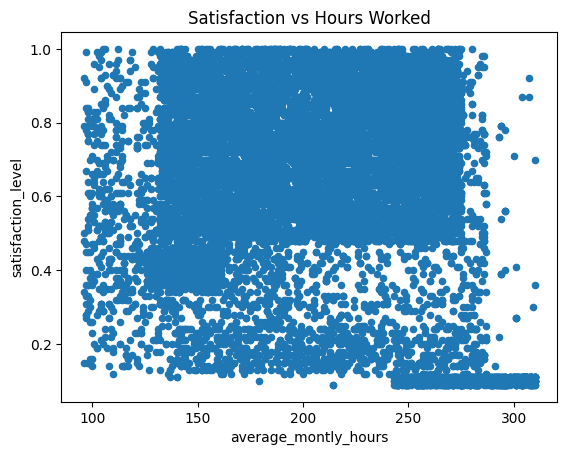

In [ ]:
employee_df.plot(kind='scatter', x='average_montly_hours', y='satisfaction_level', title='Satisfaction vs Hours Worked')

<Axes: title={'center': 'Average Monthly Hours'}, ylabel='Frequency'>

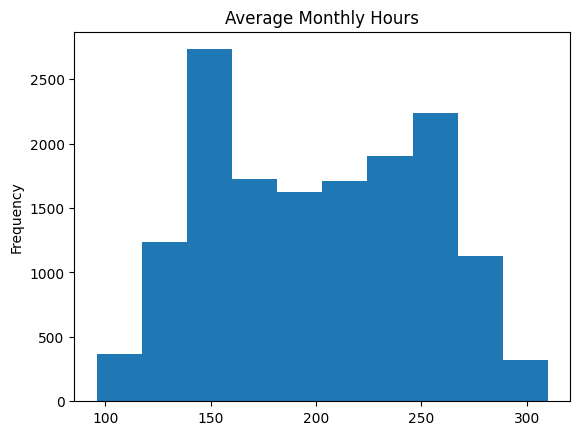

In [ ]:
employee_df['average_montly_hours'].plot(kind='hist', title='Average Monthly Hours')

<Axes: >

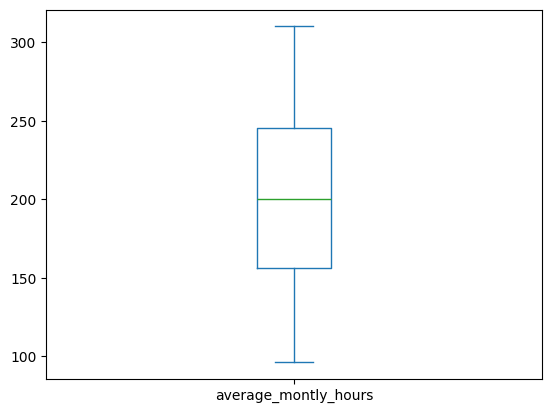

In [ ]:
employee_df['average_montly_hours'].plot(kind='box')

In [ ]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   salary                 14999 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


In [ ]:
from sklearn.model_selection import train_test_split # to create training and testing data
from sklearn.preprocessing import StandardScaler # for scaling data
from sklearn.neighbors import KNeighborsClassifier # to build kNN model
from sklearn.metrics import roc_auc_score # to evaluate model using ROC AUC
from sklearn.neighbors import KNeighborsRegressor # to build kNN model
from sklearn.metrics import mean_squared_error, r2_score # to evaluate model using MSE
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt # for data visualization purposes

In [ ]:
employee_df['salary'] = employee_df['salary'].apply(lambda x: 1 if x == 'low' else 2 if x == 'medium' else 3)
employee_df.value_counts('salary')

,count
salary,
1,7316
2,6446
3,2025


In [ ]:
X = employee_df.drop(columns = employee_df.columns[0])
y = employee_df['satisfaction_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Update y_train to match X_train
X_test = X_test.dropna()
y_test = y_test[X_test.index]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11997, 8)
(3002, 8)
(11997,)
(3002,)


In [ ]:
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,-2.037973,0.897454,1.776075,1.279970,1.015784,-0.413396,-0.146478,0.634358
1,-1.121046,0.955845,1.776075,0.357707,1.015784,-0.413396,-0.146478,-0.936415
2,-0.323719,-0.211973,0.159293,0.257461,-0.347344,-0.413396,-0.146478,0.634358
3,0.513474,1.072626,0.159293,0.498051,1.015784,-0.413396,-0.146478,0.634358
4,0.234410,-1.146227,0.159293,1.219822,-1.028908,-0.413396,-0.146478,0.634358


In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test)
print(y_pred)

[0.718 0.858 0.228 ... 0.67  0.206 0.56 ]


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 0.0015
R-squared: 0.9731


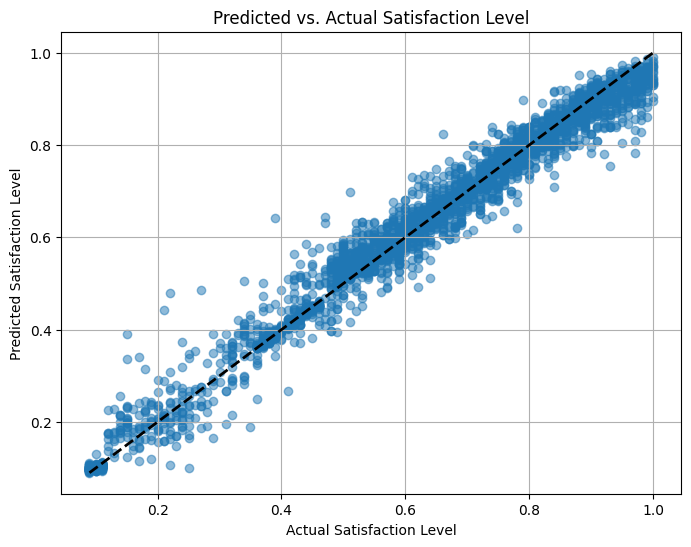

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(y_test, y_pred, alpha=0.5)  # Alpha for transparency
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel("Actual Satisfaction Level")
plt.ylabel("Predicted Satisfaction Level")
plt.title("Predicted vs. Actual Satisfaction Level")
plt.grid(True)
plt.show()

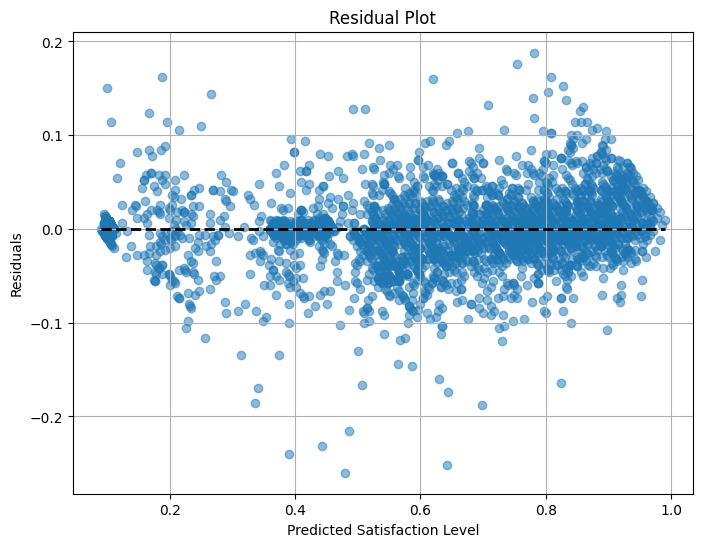

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='k', linestyles='--', lw=2)
plt.xlabel("Predicted Satisfaction Level")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

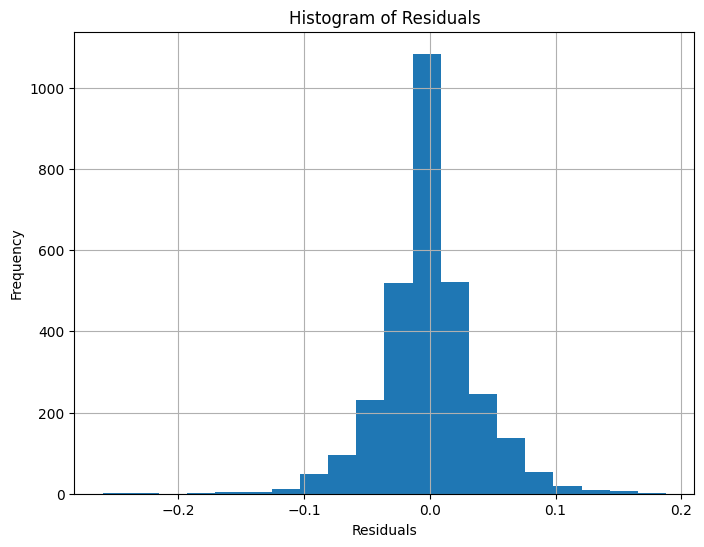

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)  # Adjust bins as needed
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.grid(True)
plt.show()

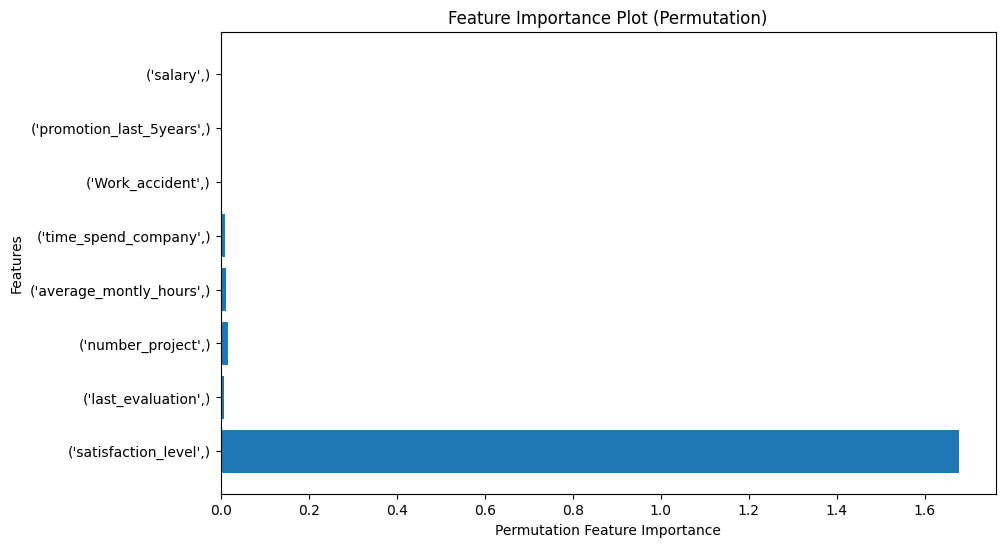

In [ ]:
# Calculate permutation importance
result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
features = X_train.columns

# Convert features (pandas.Index) to a list of strings
features = [str(col) for col in features] # Convert each element to a string
#features = features.tolist()  # This line is added

# Create the feature importance plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Permutation Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot (Permutation)")
plt.show()